In [ ]:
## eg.1.
import argparse  #argparse是python的一个命令行解析包

import matplotlib.animation as animation
from matplotlib.colors import ListedColormap

yeah = ('purple', 'yellow')
cmap = ListedColormap(yeah)

ON = 255
OFF = 0
vals = [ON, OFF]


def randomGrid(N):
    """returns a grid of NxN random values"""
    return np.random.choice(vals, N * N, p=[0.2, 0.8]).reshape(N, N)  #采用随机的初始状态


def addGlider(i, j, grid):
    """adds a glider with top-left cell at (i, j)"""
    glider = np.array([[0, 0, 255],
                       [255, 0, 255],
                       [0, 255, 255]])  # 3×3 的 numpy 数组定义了滑翔机图案（看上去是一种在网格中平稳穿越的图案）。
    grid[i:i + 3, j:j + 3] = glider  #可以看到如何用 numpy 的切片操作，将这种图案数组复制到模拟的二维网格中，它的左上角放在 i和 j指定的坐标，即用这个方法在网格的特定行和列增加一个图案，


#实现环形边界条件
def update(frameNum, img, grid, N):
    newGrid = grid.copy()
    for i in range(N):
        for j in range(N):
            total = int((grid[i, (j - 1) % N] + grid[i, (j + 1) % N] +
                         grid[(i - 1) % N, j] + grid[(i + 1) % N, j] +
                         grid[(i - 1) % N, (j - 1) % N] + grid[(i - 1) % N, (j + 1) % N] +
                         grid[(i + 1) % N, (j - 1) % N] + grid[
                             (i + 1) % N, (j + 1) % N]) / 255)  #因为需要检测网格的 8个边缘。更简洁的方式是用取模（%）运算符，可以用这个运算符让值在边缘折返

            # Conway实现规则 :生命游戏的规则基于相邻细胞的 ON 或 OFF 数目。为了简化这些规则的应用，可以计算出处于 ON 状态的相邻细胞总数。
            if grid[i, j] == ON:
                if (total < 2) or (total > 3):
                    newGrid[i, j] = OFF
            else:
                if total == 3:
                    newGrid[i, j] = ON

    # update data
    img.set_data(newGrid)
    grid[:] = newGrid[:]
    return img,


#向程序发送命令行参数，mian()
def main():
    # command line arguments are in sys.argv[1], sys.argv[2], ...
    # sys.argv[0] is the script name and can be ignored
    # parse arguments
    parser = argparse.ArgumentParser(description="Runs Conway's Game of Life simulation.")
    # add arguments
    parser.add_argument('--grid-size', dest='N', required=False)  #定义了可选参数，指定模拟网格大小N
    parser.add_argument('--mov-file', dest='movfile', required=False)  #指定保存.mov 文件的名称
    parser.add_argument('--interval', dest='interval', required=False)  #设置动画更新间隔的毫秒数
    parser.add_argument('--glider', action='store_true', required=False)  #用滑翔机图案开始模拟
    parser.add_argument('--gosper', action='store_true', required=False)
    args = parser.parse_args()

    #初始化模拟   
    # set grid size
    N = 100
    if args.N and int(args.N) > 8:
        N = int(args.N)

    # set animation update interval
    updateInterval = 50
    if args.interval:
        updateInterval = int(args.interval)

    # declare grid
    grid = np.array([])
    # check if "glider" demo flag is specified，设置初始条件，要么是默认的随机图案，要么是滑翔机图案。
    if args.glider:
        grid = np.zeros(N * N).reshape(N, N)  #创建 N×N 的零值数组，
        addGlider(1, 1, grid)  #调用 addGlider()方法，初始化带有滑翔机图案的网格
    else:
        # populate grid with random on/off - more off than on
        grid = randomGrid(N)

    # 设置动画
    fig, ax = plt.subplots(facecolor='pink')  #配置 matplotlib 的绘图和动画参数
    img = ax.imshow(grid, cmap=cmap,
                    interpolation='nearest')  #用plt.show()方法将这个矩阵的值显示为图像，并给 interpolation 选项传入'nearest'值，以得到尖锐的边缘（否则是模糊的）
    ani = animation.FuncAnimation(fig, update, fargs=(img, grid, N,),
                                  #animation.FuncAnimation()调用函数 update()，该函数在前面的程序中定义，根据 Conway 生命游戏的规则，采用环形边界条件来更新网格。
                                  frames=10,
                                  interval=updateInterval,
                                  save_count=50)
    # number of frames?
    # set the output file
    if args.movfile:
        ani.save(args.movfile, fps=30, extra_args=['-vcodec', 'libx264'])
    plt.show()


# call main
if __name__ == '__main__':
    main()

In [ ]:
## eg.2.
import numpy as np  #科学计算库 处理多维数据(矩阵)
import matplotlib.pyplot as plt  #绘图工具库
import matplotlib as mpl

#设置基本参数
global Row, Col  #定义全局变量行和列
Row = 100  #行
Col = 100  #列
forest_area = 0.8  #初始化这个地方是树木的概率
firing = 0.8  #绿树受到周围树木引燃的概率
grow = 0.001  #空地上生长出树木的概率
lightning = 0.00006  #闪电引燃绿树的概率
forest = (np.random.rand(Row, Col) < forest_area).astype(np.int8)
#初始化作图
plt.title("step=1", fontdict={"family": 'Times New Roman', "weight": 'bold', "fontsize": 20})  #字体，加粗，字号
colors = [(0, 0, 0), (0, 1, 0), (1, 0, 0)]  #黑色空地 绿色树 红色火
bounds = [0, 1, 2, 3]  #类数组，单调递增的边界序列
cmap = mpl.colors.ListedColormap(colors)  #从颜色列表生成颜色的映射对象
w = plt.imshow(forest, cmap=cmap, norm=mpl.colors.BoundaryNorm(bounds, cmap.N))

#迭代
T = 500  #迭代500次
for t in range(T):
    temp = forest  #上一个状态的森林
    temp = np.where(forest == 2, 0, temp)  #燃烧的树变成空地
    p0 = np.random.rand(Row, Col)  #空位变成树木的概率
    temp = np.where((forest == 0) * (p0 < grow), 1, temp)  #如果这个地方是空位，满足长成绿树的条件，那就变成绿树
    fire = (forest == 2).astype(np.int8)  #找到燃烧的树木
    firepad = np.pad(fire, (1, 1), 'wrap')  #上下边界，左右边界相连接
    numfire = firepad[0:-2, 1:-1] + firepad[2:, 1:-1] + firepad[1:-1, 0:-2] + firepad[1:-1, 2:]
    p21 = np.random.rand(Row, Col)  #绿树因为引燃而变成燃烧的树
    p22 = np.random.rand(Row, Col)  #绿树因为闪电而变成燃烧的树
    #Temp = np.where((forest == 1)&(((numfire>0)&(rule1prob<firing))|((numfire==0)&(rule3prob<lightning))),2,Temp)
    temp = np.where((forest == 1) & (((numfire > 0) & (p21 < firing)) | ((numfire == 0) & (p22 < lightning))), 2, temp)

    forest = temp  #更新森林的状态
    plt.title("step=" + str(t), fontdict={"family": 'Times New Roman', "weight": 'bold', "fontsize": 20})  #字体，加粗，字号
    w.set_data(forest)
    plt.savefig('./元胞自动机//' + str(t) + '.jpg')
    plt.pause(0.1)
plt.show()
from PIL import Image

im = Image.open("./元胞自动机//0.jpg")
images = []
for i in range(1, 200):
    images.append(Image.open('./元胞自动机//' + str(i) + '.jpg'))
im.save('1125.gif', save_all=True, append_images=images, duration=100)

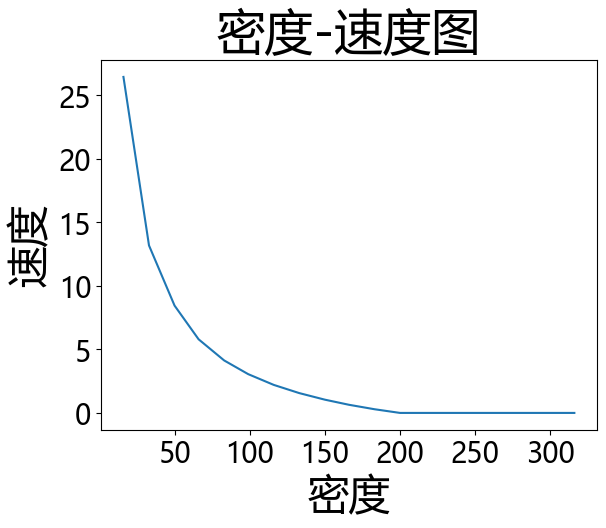

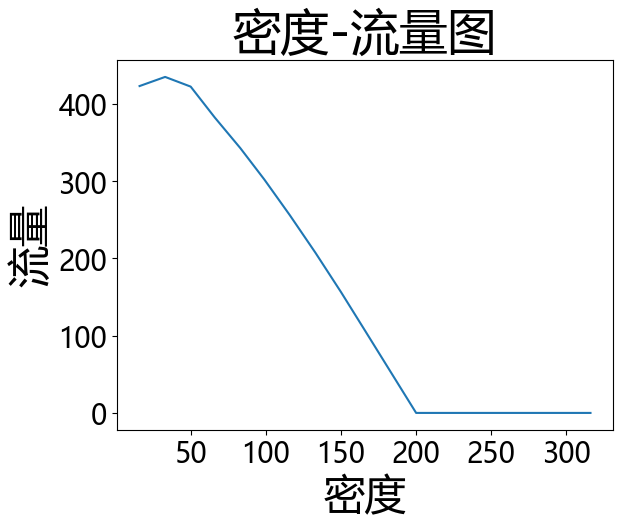

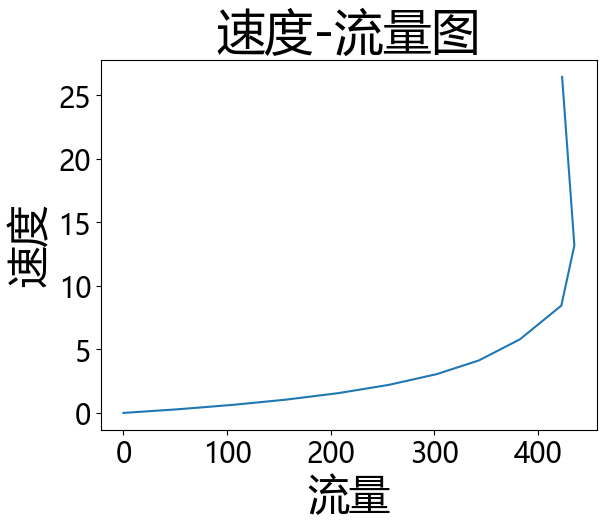

In [3]:
## eg.3.
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
mpl.rcParams['axes.unicode_minus'] = False

import xlwt


class Car:

    def _init_(self, length, width):
        self.length = length  #车长
        self.width = width  #车宽

    length = 3
    width = 1.6

    # 静态参数
    S = 2  #静态车间距
    T = 1.6  #车头时距
    aMax = 0.73  #最大期望加速度
    bMax = 1.67  #最大期望减速度
    V0 = 33.3  #m/s
    par = 0.6

    # 更新车间距
    def updateD(self):
        if self.X > self.front.X:
            self.D = self.X - self.front.X + self.front.length - Road.length
        else:
            self.D = self.X - self.front.X + self.front.length

    # 更新速度差
    def updatedV(self):
        self.dV = self.V - self.front.V

    # 更新期望跟驰距离
    def updateD_des(self):
        self.updatedV()
        self.D_des = self.S + self.V * self.T + self.V * self.dV / (2 * (self.aMax * self.bMax) ** 0.5)

    # 更新加速度
    def updateA(self):
        self.updateD()
        self.updateD_des()
        self.A = self.par * (1 - (self.V / self.V0) ** 4 - (self.D_des / self.D) ** 2)

    # 更新速度
    def updateV(self):
        self.updateA()
        self.V = max(self.V + self.A, 0)

    # 更新位置
    def updateX(self):
        self.updateV()
        self.X = (self.X + self.V) % Road.length


class Road:
    def _init_(self, motorPercent, length, width):
        self.motorPercent = motorPercent  #道路占有率
        self.length = length  #车道长度
        self.width = width  #车道宽度

    motorPercent = 0.9
    length = 1000
    width = 3.5

    # 车辆加载
    def initCars(self):
        # 计算车辆数量
        self.numOfCar = (int)(self.length / 3 * self.motorPercent)
        # 生成车辆
        self.ls = []
        gas = (self.length / self.numOfCar)
        for i in range(self.numOfCar):
            c = Car()
            # 等间距放置车辆
            c.X = i * gas
            c.Y = 1
            c.V = 0
            c.index = i
            self.ls.append(c)
            # 新增车辆为上一辆车的前车
            if i > 0:
                c.back = self.ls[self.ls.index(c) - 1]
                c.back.front = c
            # 设置车辆颜色
            c.color = [random.random(), random.random(), random.random()]
        #头车的前车是尾车
        self.ls[len(self.ls) - 1].front = self.ls[0]
        self.ls[0].back = self.ls[len(self.ls) - 1]

    # 画图函数
    def draw(self, ax):
        # 绘制道路
        rect = plt.Rectangle([0, 0], self.length, self.width, fill=False, facecolor=[0, 0, 1])
        ax.add_patch(rect)
        plt.xlim(0, 300)
        plt.ylim(-50, 50)
        # 绘制车辆
        for i in range(self.numOfCar):
            c = self.ls[i]
            rect = plt.Rectangle([c.X, c.Y], c.length, c.width, facecolor=c.color)
            ax.add_patch(rect)

    # 运行效果展示函数
    def show(self, timeMax):
        # 初始化道路        
        self.initCars()
        # 创建画布
        fig = plt.figure()
        ax = fig.add_subplot(111)
        # 开始仿真
        for time in range(timeMax):
            # 车辆位置更新
            for c in self.ls:
                c.updateX()
            # 汇出更新后车辆位置
            plt.cla()
            self.draw(ax)
            plt.pause(0.1)
        # 删除画布
        plt.close(fig)


# 获取输入道路的平均车速
def get_vMean(r, timeMax):
    # 初始化道路        
    r.initCars()
    # 开始仿真
    ls = []
    vSum = 0
    for time in range(timeMax):
        # 车辆位置更新
        for c in r.ls:
            c.updateX()
            vSum = vSum + c.V
        # 计算当前时间步平均车速
        ls.append(vSum / r.numOfCar)
        vSum = 0
    return sum(ls) / len(ls)


def get_K_V():
    V_ls = np.zeros((1, 20))
    K_ls = np.zeros((1, 20))
    timeMax = 1000
    j = 0
    for i in np.arange(0.05, 1, 0.05):
        r = Road()
        r.motorPercent = i
        V_ls[0, j] = get_vMean(r, timeMax)
        K_ls[0, j] = r.numOfCar / r.length * 1000
        j = j + 1
    return (K_ls, V_ls)


def plot_K_V(K_V):
    # 输入元组第0个元素为密度，第1个元素为平均速度
    ls_K = []
    ls_V = []
    for i in range(19):
        ls_K.append(K_V[0][0, i])
        ls_V.append(K_V[1][0, i])
    plt.plot(ls_K, ls_V)
    plt.title('密度-速度图', fontsize=35)
    plt.xlabel('密度', fontsize=30)
    plt.ylabel('速度', fontsize=30)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()


def plot_K_Q(K_V):
    # 输入元组第0个元素为密度，第1个元素为平均速度
    ls_K = []
    ls_Q = []
    for i in range(19):
        ls_K.append(K_V[0][0, i])
        ls_Q.append(K_V[1][0, i] * K_V[0][0, i])
    plt.plot(ls_K, ls_Q)
    plt.title('密度-流量图', fontsize=35)
    plt.xlabel('密度', fontsize=30)
    plt.ylabel('流量', fontsize=30)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()


def plot_V_Q(K_V):
    # 输入元组第0个元素为密度，第1个元素为平均速度
    ls_V = []
    ls_Q = []
    for i in range(19):
        ls_V.append(K_V[1][0, i])
        ls_Q.append(K_V[1][0, i] * K_V[0][0, i])
    plt.plot(ls_Q, ls_V)
    plt.title('速度-流量图', fontsize=35)
    plt.xlabel('流量', fontsize=30)
    plt.ylabel('速度', fontsize=30)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()


def xlsWrite(K_V):
    workbook = xlwt.Workbook(encoding='ascii')
    worksheet = workbook.add_sheet("三参数")
    worksheet.write(0, 0, "密度")
    worksheet.write(0, 1, "速度")
    worksheet.write(0, 2, "流量")
    for i in range(20):
        worksheet.write(i + 1, 0, K_V[0][0, i])
        worksheet.write(i + 1, 1, K_V[1][0, i])
        worksheet.write(i + 1, 2, K_V[0][0, i] * K_V[1][0, i])
    fname = "三参数数据.xls"
    workbook.save(fname)


#################### main
# 创建道路
r = Road()
# 展示动画
################### 动画展示
'''
r.motorPercent = 0.3
timeMax = 100
r.show(timeMax)
'''
################### 三参数图
# 获取占有率-速度
K_V = get_K_V()
# 汇出密度-速度图
plot_K_V(K_V)
# 汇出密度-流量图
plot_K_Q(K_V)
# 汇出速度-流量图
################### 导出数据
plot_V_Q(K_V)
# 写入excel文件
xlsWrite(K_V)
################### V0变化
# for i in range(1,7):
#     Car.V0 = 5*i
#     K_V = get_K_V()
#     plot_K_Q(K_V)
#     #plot_V_Q(K_V)
#     #plot_K_V(K_V)
# plt.legend(labels=['5','10','15','20','25','30'],fontsize = 20)
################### S变化
# for i in range(1,6):
#     Car.S = i
#     K_V = get_K_V()
#     #plot_K_Q(K_V)
#     #plot_V_Q(K_V)
#     plot_K_V(K_V)
# plt.legend(labels=['1','2','3','4','5'],fontsize = 20)
################### par变化
# for i in range(1,6):
#     Car.par = i*0.2
#     K_V = get_K_V()
#     plot_K_Q(K_V)
#     #plot_V_Q(K_V)
#     #plot_K_V(K_V)
# plt.legend(labels=['0.2','0.4','0.6','0.8','1'],fontsize = 20)

In [4]:
import math
from Code_Source.Trands.src.road import *
from Code_Source.Trands.src.vehicle_generator import Vehicle_generator
from Code_Source.Trands.src.vehicle import Vehicle
from Code_Source.Trands.src.vehicle_enum import Color
from Code_Source.Trands.src.detector import Detector


# 创建仿真使用的车辆类
# 自动驾驶类
class Auto(Vehicle):
    a = 3  # 加速度
    b = 4  # 减速度
    color = Color.red  # 车辆颜色
    v_max = 30  # 最大速度
    length = 5  # 车辆长度

    # 更新车速
    def update_v(self):
        is_forefront = self.__is_forefront()  # 判断是否为头车
        if is_forefront:
            # 头车0.2概率静止
            if random.random() < 0.2:
                self.v = 0
                return
        gap = max(self.get_gap(), 0)
        gap_safe = 1
        v_safe = 1
        if gap > gap_safe:
            self.v = min(v_safe, self.v + self.a, self.v_max, gap)
        elif gap < gap_safe:
            self.v = max(min(v_safe, gap), 0)
        else:
            # 匀速
            self.v = min(self.v, gap)

    # 判断车辆是否为头车
    def __is_forefront(self):
        if self.front is None and self.x > self.driving_on.length - 2:
            return True
        return False

    # 判断能否向传入方向换道
    def _can_change_lane(self, direction):
        """
        目标车道前车距 ＞ 当前车道前车距 且 目标车道后车距 ＞ 最大车速
        :param direction: 换道方向 为 Direction枚举类对向
        :return: 能否向传入方向换道
        """
        gap = self.get_gap()  # 前车距
        if direction == Direction.right:
            if self.lane == 0:
                return False
            gap_desire_front = self.get_gap_right()  # 右前车距
            gap_desire_back = self.get_gap_back_right()  # 右后车距
        else:
            if self.lane == self.driving_on.lane_num - 1:
                return False
            gap_desire_front = self.get_gap_left()  # 左前车距
            gap_desire_back = self.get_gap_back_left()  # 左后车距
        if gap_desire_front > gap and gap_desire_back > self.v_max:
            return True
        else:
            return False

    # 判断是否需要换道
    def _need_change_lane(self):
        """
        如果前车距 ＜ 最大车速 则换道
        :return: 是否换道
        """
        gap = self.get_gap()  # 前车距
        if gap < self.v_max:
            return True
        else:
            return False


# 手动驾驶车类
class Car(Auto):
    color = Color.blue  # 车辆颜色

    def update_v(self):
        super(Car, self).update_v()
        # 随机慢化
        rou = 100
        if random.random() < get_p_slow(rou):
            self.v = max(self.v - self.b, 0)


# 计算随机慢化概率
def get_p_slow(rou):
    M = 200  # 1千米长的道路上所能容纳的最大车辆数
    return 0.1 + 0.4 * ((1 + M * math.exp(-0.05 * rou)) ** (1 / (-0.95)))


def show(road):
    run_time = 100
    # 展示仿真动画
    road.show(run_time)
    # 检测当前规则是否会发生碰撞
    road.has_accident()


if __name__ == '__main__':
    # 创建车辆生成器
    vehicle_num = 60
    vehicle_generator = Vehicle_generator({Car: 0.5, Auto: 0.5},
                                          vehicle_num=vehicle_num)
    # 创建车道对象
    lane_length = 100  # 2000
    L1 = Lane({'普通车道': lane_length})
    lanes = [L1]
    # 创建检测器
    detector = Detector()
    # 创建道路
    r = Road(lanes, vehicle_generator, detector)
    run_time = 200  # 20000

    # 仿真展示
    # show(r)

    # 跑流量
    r.run(run_time)
    print(' ')

ModuleNotFoundError: No module named 'src'

In [ ]:
## eg.4
# coding:utf-8
# 状态：
# S0表示易感者S
# S1表示感染者I
# S2表示治愈者R
# S3表示潜伏者E

# 规则：
# 1. 当S=S0时，为易感者，被感染率为p=k*(上下左右邻居的感染者)/4+l*(左上左下右上右下邻居的感染者)/4,概率c1变为潜伏者,概率1-c1变为感染者
# 2. 当S=S1时，为感染者，具有一定的感染能力，等待t_max时间，会自动变为S2治愈者，染病时间初始化为0
# 3. 当S=S2时，为治愈者，[具有一定的免疫能力，等待T_max时间，会自动变为S0易感者，免疫时间初始化为0],改为永久免疫
# 4. 当S=S3时,为潜伏者,等待t1_max时间(潜伏时间),会自动变为S1感染者,潜伏时间初始化为0,
from pylab import *
import random
import numpy as np
import pygame
import sys
import matplotlib.pyplot as plt

# 初始化相关数据
k = 0.85  #上下左右概率
l = 0.55  #其它概率
c1 = 0.4  #c1概率变为潜伏者
t1_max = 15  #潜伏时间
t_max = 50  #治愈时间
T_max = 75  #免疫时间   #暂时不用


# p = np.array([0.6, 0.4])
# probability = np.random.choice([True, False],
# p=p.ravel())  # p(感染or潜伏)=(self.s1_0*k+self.s1_1*l) p(易感)=1-(self.s1_0*k+self.s1_1*l)

def probablity_fun():
    np.random.seed(0)
    # p = np.array([(self.s1_0*k+self.s1_1*l),1-(self.s1_0*k+self.s1_1*l)])
    p = np.array([0.6, 0.4])
    probability = np.random.choice([True, False],
                                   p=p.ravel())  # p(感染or潜伏)=(self.s1_0*k+self.s1_1*l) p(易感)=1-(self.s1_0*k+self.s1_1*l)
    return probability


RED = (255, 0, 0)
GREY = (127, 127, 127)
Green = (0, 255, 0)
BLACK = (0, 0, 0)

"""细胞类，单个细胞"""


class Cell:
    # 初始化
    stage = 0

    def __init__(self, ix, iy, stage):
        self.ix = ix
        self.iy = iy
        self.stage = stage  #状态，初始化默认为0，易感者
        # self.neighbour_count = 0    #周围细胞的数量
        self.s1_0 = 0  #上下左右为感染者的数量
        self.s1_1 = 0  #左上左下右上右下感染者的数量
        self.T_ = 0  #免疫时间
        self.t_ = 0  #患病时间
        self.t1_ = 0  #潜伏时间

    # 计算周围有多少个感染者
    def calc_neighbour_count(self):
        count_0 = 0
        count_1 = 0
        pre_x = self.ix - 1 if self.ix > 0 else 0
        for i in range(pre_x, self.ix + 1 + 1):
            pre_y = self.iy - 1 if self.iy > 0 else 0
            for j in range(pre_y, self.iy + 1 + 1):
                if i == self.ix and j == self.iy:  # 判断是否为自身
                    continue
                if self.invalidate(i, j):  # 判断是否越界
                    continue
                if CellGrid.cells[i][j].stage == 1 or CellGrid.cells[i][j] == 3:  #此时这个邻居是感染者
                    #如果是在上下左右
                    if (i == self.ix and j == self.iy - 1) or \
                            (i == self.ix and j == self.iy + 1) or \
                            (i == self.ix - 1 and j == self.iy) or \
                            (i == self.ix + 1 and j == self.iy):
                        count_0 += 1
                    else:
                        count_1 += 1
        # print(count_0)
        self.s1_0 = count_0
        # if self.s1_1!=0:
        #     print(count_1,count_0,self.ix,self.iy)
        self.s1_1 = count_1

    # 判断是否越界
    def invalidate(self, x, y):
        if x >= CellGrid.cx or y >= CellGrid.cy:
            return True
        if x < 0 or y < 0:
            return True
        return False

    # 定义规则
    def next_iter(self):
        # 规则1，易感者
        if self.stage == 0:
            probability = random.random()  #生成0到1的随机数
            s1_01 = self.s1_0 * k + self.s1_1 * l

            if (s1_01 > probability) and (s1_01 != 0):
                p1 = random.random()
                if p1 > c1:
                    self.stage = 1
                else:
                    self.stage = 3
            else:
                self.stage = 0
        # 规则2，感染者
        elif self.stage == 1:
            if self.t_ >= t_max:
                self.stage = 2
            else:
                self.t_ = self.t_ + 1
        # 规则3，治愈者(永久免疫规则)
        elif self.stage == 2:
            if self.T_ >= T_max:
                self.stage = 0
            else:
                self.T_ = self.T_ + 1
        # 规则4,潜伏者
        elif self.stage == 3:
            if self.t1_ >= t1_max:
                self.stage = 1  # 转变为感染者
            else:
                self.t1_ += 1


"""细胞网格类，处在一个长cx,宽cy的网格中"""


class CellGrid:
    cells = []
    cx = 0
    cy = 0

    # 初始化
    def __init__(self, cx, cy):
        CellGrid.cx = cx
        CellGrid.cy = cy
        for i in range(cx):
            cell_list = []
            for j in range(cy):
                cell = Cell(i, j, 0)  #首先默认为全是易感者
                if (i == cx / 2 and j == cy / 2) or (i == cx / 2 + 1 and j == cy / 2) or (
                        i == cx / 2 + 1 and j == cy / 2 + 1):  #看26行就可以了
                    cell_list.append(Cell(i, j, 1))
                else:
                    cell_list.append(cell)
            CellGrid.cells.append(cell_list)

    def next_iter(self):
        for cell_list in CellGrid.cells:
            for item in cell_list:
                item.next_iter()

    def calc_neighbour_count(self):
        for cell_list in CellGrid.cells:
            for item in cell_list:
                item.calc_neighbour_count()

    def num_of_nonstage(self):
        # global count0_,count1_,count2_
        count0 = 0
        count1 = 0
        count2 = 0
        count3 = 0
        for i in range(self.cx):
            for j in range(self.cy):
                # 计算全部的方格数
                cell = self.cells[i][j].stage
                if cell == 0:
                    count0 += 1
                elif cell == 1:
                    count1 += 1
                elif cell == 2:
                    count2 += 1
                elif cell == 3:
                    count3 += 1
        return count0, count1, count2, count3


'''界面类'''


class Game:
    screen = None
    count0 = 0
    count1 = 9
    count2 = 0
    count3 = 0

    def __init__(self, width, height, cx, cy):  #屏幕宽高，细胞生活区域空间大小
        self.width = width
        self.height = height
        self.cx_rate = int(width / cx)
        self.cy_rate = int(height / cy)
        self.screen = pygame.display.set_mode([width, height])  #
        self.cells = CellGrid(cx, cy)

    def show_life(self):
        for cell_list in self.cells.cells:
            for item in cell_list:
                x = item.ix
                y = item.iy
                if item.stage == 0:
                    pygame.draw.rect(self.screen, GREY,
                                     [x * self.cx_rate, y * self.cy_rate, self.cx_rate, self.cy_rate])
                elif item.stage == 2:
                    pygame.draw.rect(self.screen, Green,
                                     [x * self.cx_rate, y * self.cy_rate, self.cx_rate, self.cy_rate])
                elif item.stage == 1:
                    pygame.draw.rect(self.screen, RED,
                                     [x * self.cx_rate, y * self.cy_rate, self.cx_rate, self.cy_rate])
                elif item.stage == 3:
                    pygame.draw.rect(self.screen, BLACK,
                                     [x * self.cx_rate, y * self.cy_rate, self.cx_rate, self.cy_rate])

    # def count_num(self):
    #     self.count0, self.count1, self.count2,self.count3 = self.cells.num_of_nonstage()


mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
if __name__ == '__main__':
    count0_ = []
    count1_ = []
    count2_ = []
    count3_ = []
    pygame.init()
    pygame.display.set_caption("传染病模型")
    game = Game(800, 800, 200, 200)

    clock = pygame.time.Clock()
    k1 = 0
    while True:
        k1 += 1
        print(k1)

        # game.screen.fill(GREY)#底部全置灰
        clock.tick(100)  # 每秒循环10次
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                sys.exit()
        game.cells.calc_neighbour_count()
        count0, count1, count2, count3 = game.cells.num_of_nonstage()
        # count0,count1,count2 = game.count_num()
        count0_.append(count0)
        count1_.append(count1)
        count2_.append(count2)
        count3_.append(count3)
        if count2 > 200 * 190:  # 退出条件
            break

        plt.plot(count0_, color='y', label='易感者')
        plt.plot(count3_, color='b', label='潜伏者')
        plt.plot(count1_, color='r', label='感染者')
        plt.plot(count2_, color='g', label='治愈者')
        # plt.ylim([0,80000])
        plt.legend()
        plt.xlabel('时间单位')
        plt.ylabel('人数单位')
        plt.pause(0.1)  #0.1秒停一次
        plt.clf()  #清除

        # plt.close()#退出
        game.show_life()
        pygame.display.flip()
        game.cells.next_iter()

    plt.show()  #显示